# Import Libraries and Dataset

In [1]:
import pandas as pd
import quandl
import numpy as np
import quandl
import matplotlib.pyplot as plt
import os
import math
#import talib

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import operator
import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(20, 8), dpi=100)
from datetime import datetime
ticker = ['WellsFargo', 'GoldmanSachs']

In [2]:
os.chdir("C:\\Users\\hdharmaw\\OneDrive - GMO\\Documents\\4742\\project\\EventPrediction_DeepLearning\\FinalData")
data_WF = pd.read_excel("WFC-US_Final0.xlsx")
data_GS = pd.read_excel("GS_FinalData.xlsx")
print('Total WF dataset has {} days, and {} features.'.format(data_WF.shape[0], \
                                                              data_WF.shape[1]))
print('Total GS dataset has {} days, and {} features.'.format(data_GS.shape[0], \
                                                              data_GS.shape[1]))

df_WF = data_WF.copy()
df_GS = data_GS.copy()
dataset = [df_WF, df_GS]

for item in dataset:
    del item['Date']
    
#df_clf = data.copy()
'''
del df['Earning_Surprise_0.05']
del df['Earning_Surprise_0.1']
del df['Earning_Surprise_0.15']
'''


Total WF dataset has 4968 days, and 268 features.
Total GS dataset has 4986 days, and 356 features.


"\ndel df['Earning_Surprise_0.05']\ndel df['Earning_Surprise_0.1']\ndel df['Earning_Surprise_0.15']\n"

In [3]:
'''
df_clf = data.copy()
del df_clf['Date']
'''

"\ndf_clf = data.copy()\ndel df_clf['Date']\n"

In [7]:
class Plot:
    
    def __init__(self, data):
        self.data = data
        
    def autocorr(self, col, ticker):
        
        plot_acf(self.data[col], title = col + ' Autocorrelation Plot of ' + ticker)
        plt.show()
            
    def featureImportance(self, feature_importance, num_features, flag, ticker):
    
        f = dict()
        n = len(feature_importance)
        for i in range (n):
            f[X_test.columns[i]] = feature_importance[i]
        f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
        f = f[:num_features]
        feature_name = list()
        feature_values = list()
        for i, j in f:
            feature_name.append(i)
            feature_values.append(j)
        fig = plt.figure(figsize=(14,5))
        plt.xticks(rotation='vertical')
        plt.bar([i for i in range(len(f))], feature_values, tick_label=feature_name)
        if flag == 1:
            plt.title('Feature importance for EPS Prediction of ' + ticker + ' (Excluding Analyst estimate features)')
        else:
            plt.title('Feature importance for EPS Prediction of ' + ticker + ' (Including Analyst estimate features)')
        plt.show()
    
    def lossStatsAndCurve(self, X_test, Y_test, regressor, ticker):
        
        
        rmse = np.sqrt(mean_squared_error(Y_test, regressor.predict(X_test)))
        print("Root Mean Squared Error: %f" % (rmse))
        #print ("Regression Prediction Score: " + str(round(regressor.score(X_test,Y_test) * 100, 2)) + "%")
        eval_result = regressor.evals_result()
        training_rounds = range(len(eval_result['validation_0']['rmse']))
        plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
        plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title('Training Vs Validation Error of ' + ticker)
        plt.legend()
        plt.show()

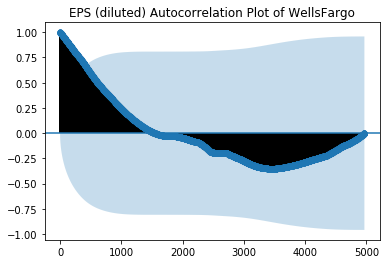

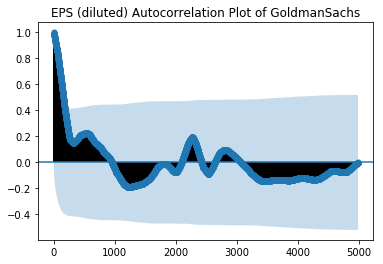

In [8]:
i = 0
for df in dataset:
    plot = Plot(df)
    plot.autocorr('EPS (diluted)', ticker[i])
    i = i + 1

## Using XGBoost Method for EPS prediction (Regression Problem) and Feature Importance

In [9]:
class Model:
    def __init__(self, X_train, Y_train, X_test, Y_test):
        
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
    
    def trainModel(self, epoch = 1000, verbose_flag = False, learning_rate = 0.01):
        
        regressor = xgb.XGBRegressor(colsample_bytree = 0.4, learning_rate = learning_rate, base_score=0.65, max_depth = 4, alpha = 10, n_estimators = epoch)
        xgbModel=regressor.fit(X_train, Y_train,eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose = verbose_flag)
        return (xgbModel, regressor)


In [10]:
def getData(data_temp, inc_analyst):
    
    data = data_temp.copy()
    Y = data['EPS (diluted)']
    
    del data['EPS (recurring)']
    del data['EPS (diluted)']
    
    if inc_analyst == False:
        #del data['Growth (YoY%)_Analyst']
        del data['EPS_Analyst']
    X = data
    
    train_samples = int(X.shape[0] * 0.75)
     
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    Y_train = Y.iloc[:train_samples]
    Y_test = Y.iloc[train_samples:]
    
    
    return (X_train, Y_train), (X_test, Y_test)

## Including Analyst Data

[01:10:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.517356


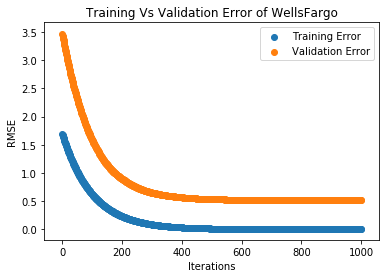

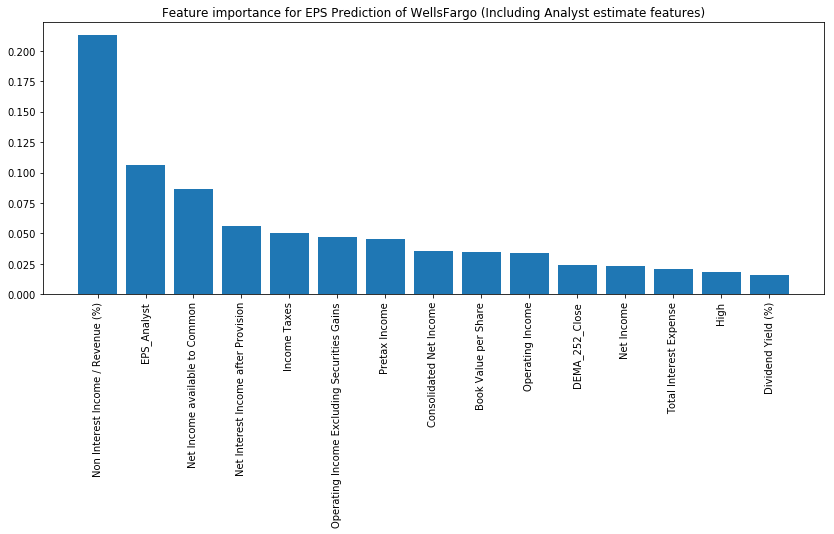

[01:11:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 3.441456


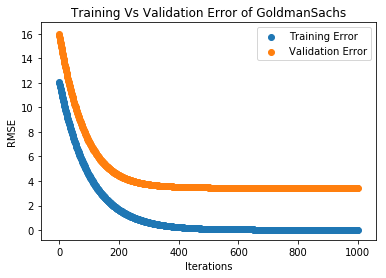

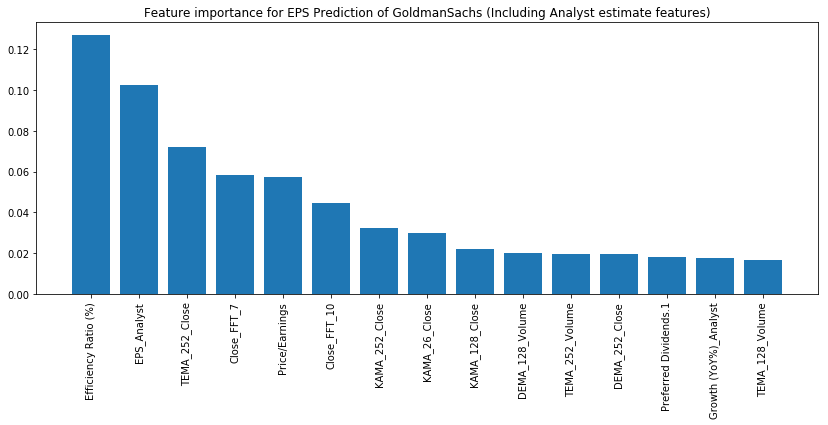

In [11]:
i = 0
for df in dataset:
    (X_train, Y_train), (X_test, Y_test) = getData(df, inc_analyst = True)

    m1 = Model(X_train, Y_train ,X_test, Y_test)
    xgbModel1, regressor1 = m1.trainModel(verbose_flag=False)

    plot.lossStatsAndCurve(X_test, Y_test, regressor1, ticker[i])
    feature_importance = xgbModel1.feature_importances_.tolist()
    plot.featureImportance(feature_importance, 15, 0, ticker[i])
    i = i + 1

In [23]:
aaa = [0.9]
zzz = regressor1.predict(aaa)
zzz


ValueError: feature_names mismatch: ['Close', 'Volume', 'Change', '% Change', '% Return', 'Total Return (Gross)', 'Cumulative Return %', 'Open', 'High', 'Low', 'Cumulative Change %', 'VWAP', 'Daily_Return', 'SMA_7_Close', 'EMA_7_Close', 'DEMA_7_Close', 'KAMA_7_Close', 'TEMA_7_Close', 'TRIMA_7_Close', 'WMA_7_Close', 'SMA_7_Daily_Return', 'EMA_7_Daily_Return', 'DEMA_7_Daily_Return', 'KAMA_7_Daily_Return', 'TEMA_7_Daily_Return', 'TRIMA_7_Daily_Return', 'WMA_7_Daily_Return', 'SMA_7_Volume', 'EMA_7_Volume', 'DEMA_7_Volume', 'KAMA_7_Volume', 'TEMA_7_Volume', 'TRIMA_7_Volume', 'WMA_7_Volume', 'SMA_14_Close', 'EMA_14_Close', 'DEMA_14_Close', 'KAMA_14_Close', 'TEMA_14_Close', 'TRIMA_14_Close', 'WMA_14_Close', 'SMA_14_Daily_Return', 'EMA_14_Daily_Return', 'DEMA_14_Daily_Return', 'KAMA_14_Daily_Return', 'TEMA_14_Daily_Return', 'TRIMA_14_Daily_Return', 'WMA_14_Daily_Return', 'SMA_14_Volume', 'EMA_14_Volume', 'DEMA_14_Volume', 'KAMA_14_Volume', 'TEMA_14_Volume', 'TRIMA_14_Volume', 'WMA_14_Volume', 'SMA_26_Close', 'EMA_26_Close', 'DEMA_26_Close', 'KAMA_26_Close', 'TEMA_26_Close', 'TRIMA_26_Close', 'WMA_26_Close', 'SMA_26_Daily_Return', 'EMA_26_Daily_Return', 'DEMA_26_Daily_Return', 'KAMA_26_Daily_Return', 'TEMA_26_Daily_Return', 'TRIMA_26_Daily_Return', 'WMA_26_Daily_Return', 'SMA_26_Volume', 'EMA_26_Volume', 'DEMA_26_Volume', 'KAMA_26_Volume', 'TEMA_26_Volume', 'TRIMA_26_Volume', 'WMA_26_Volume', 'SMA_52_Close', 'EMA_52_Close', 'DEMA_52_Close', 'KAMA_52_Close', 'TEMA_52_Close', 'TRIMA_52_Close', 'WMA_52_Close', 'SMA_52_Daily_Return', 'EMA_52_Daily_Return', 'DEMA_52_Daily_Return', 'KAMA_52_Daily_Return', 'TEMA_52_Daily_Return', 'TRIMA_52_Daily_Return', 'WMA_52_Daily_Return', 'SMA_52_Volume', 'EMA_52_Volume', 'DEMA_52_Volume', 'KAMA_52_Volume', 'TEMA_52_Volume', 'TRIMA_52_Volume', 'WMA_52_Volume', 'SMA_128_Close', 'EMA_128_Close', 'DEMA_128_Close', 'KAMA_128_Close', 'TEMA_128_Close', 'TRIMA_128_Close', 'WMA_128_Close', 'SMA_128_Daily_Return', 'EMA_128_Daily_Return', 'DEMA_128_Daily_Return', 'KAMA_128_Daily_Return', 'TEMA_128_Daily_Return', 'TRIMA_128_Daily_Return', 'WMA_128_Daily_Return', 'SMA_128_Volume', 'EMA_128_Volume', 'DEMA_128_Volume', 'KAMA_128_Volume', 'TEMA_128_Volume', 'TRIMA_128_Volume', 'WMA_128_Volume', 'SMA_252_Close', 'EMA_252_Close', 'DEMA_252_Close', 'KAMA_252_Close', 'TEMA_252_Close', 'TRIMA_252_Close', 'WMA_252_Close', 'SMA_252_Daily_Return', 'EMA_252_Daily_Return', 'DEMA_252_Daily_Return', 'KAMA_252_Daily_Return', 'TEMA_252_Daily_Return', 'TRIMA_252_Daily_Return', 'WMA_252_Daily_Return', 'SMA_252_Volume', 'EMA_252_Volume', 'DEMA_252_Volume', 'KAMA_252_Volume', 'TEMA_252_Volume', 'TRIMA_252_Volume', 'WMA_252_Volume', 'HT_Close', 'HT_Daily_Return', 'HT_Volume', 'SAR', 'ADX_14', 'ADXR_14', 'APO', 'aroondown_14', 'aroonup_14', 'AROONOSC_14', 'BOP_14', 'CCI_14', 'CMO_14', 'DX_14', 'macd', 'macdsignal', 'macdhist', 'MFI_14', 'MINUS_DM_14', 'MOM_10', 'PLUS_DI_14', 'PLUS_DM_14', 'PPO', 'ROC_10', 'ROCP_10', 'ROCR', 'RSI_14', 'RSI_26', 'STOCH_slowk', 'STOCH_slowd', 'STOCH_fastk', 'STOCH_fastd', 'STOCHRSI_fastk', 'STOCHRSI_fastd', 'TRIX_30', 'ULTOSC', 'WILLR', 'ATR_14', 'NATR_14', 'TRANGE', 'AD', 'ADOSC', 'OBV', 'ema26_close', 'ema12_close', 'MACD', 'sd_Close_14', 'upper_band_14', 'lower_band_14', 'ema_close', 'momentum', 'log_momentum', 'Net Interest Margin (%)', 'Non Interest Income / Revenue (%)', 'Return on Assets (%)', 'Return on Earning Assets', 'Return on Risk-Weighted Assets', 'Return on Equity (%)', 'Return on Common Equity', 'Efficiency Ratio (%)', 'Price/Earnings', 'Price/Book Value', 'Price/Tangible Book Value', 'Dividend Yield (%)', 'Dividends per Share_x', 'Dividend Payout Ratio (%)', 'Book Value per Share_x', 'Tangible Book Value per Share_x', 'Diluted Shares Outstanding', 'Basic Shares Outstanding', 'Total Shares Outstanding', 'Cash & Secs/Deposits', 'Invested Assets/Deposits (%)', 'Loans/Deposits (%)', 'Invested Assets+Loans/Deposits (%)', 'Loan Losses Provision/Total Loans', 'Loan Losses Reserves/Total Loans', 'Tier 1 Risk Based Capital Ratio (%)', 'Total Capital Adequacy Ratio (%)', 'Risk Weighted Assets', 'EPS_Analyst', 'Growth (YoY%)_Analyst', 'Std_7_Daily_Return', 'Std_14_Daily_Return', 'Std_21_Daily_Return', 'Close_FFT_4', 'Close_FFT_7', 'Close_FFT_10', 'Close_FFT_14', 'Close_FFT_21', 'Close_FFT_50', 'Close_FFT_100', 'Cash & Due from Banks_x', 'Investments_x', 'Net Loans', 'Investment in Unconsolidated Subs.', 'Net Property, Plant & Equipment', 'Deferred Tax Assets', 'Other Assets', 'Total Assets_x', 'Total Deposits', 'Total Debt_x', 'Provision for Risks & Charges', 'Deferred Tax Liabilities', 'Other Liabilities', 'Total Liabilities_x', 'Preferred Stock (Carrying Value)_x', 'Common Equity_x', "Total Shareholders' Equity_x", 'Accumulated Minority Interest', 'Total Equity_x', "Total Liabilities & Shareholders' Equity_x", 'Tangible Book Value per Share_y', 'Book Value per Share_y', 'Funds from Operations', 'Changes in Working Capital', 'Net Operating Cash Flow_x', 'Capital Expenditures_x', 'Capital Expenditures (Fixed Assets)', 'Net Assets from Acquisitions', 'Sale of Fixed Assets & Businesses', 'Purchase/Sale of Investments_x', 'Purchase of Investments', 'Sale/Maturity of Investments', 'Proceeds from Loans', 'Increase in Loans', 'Other Funds_x', 'Other Uses', 'Other Sources', 'Net Investing Cash Flow', 'Cash Dividends Paid', 'Common Dividends_x', 'Preferred Dividends_x', 'Change in Deposits', 'Increase in Deposits', 'Change in Capital Stock', 'Repurchase of Common & Preferred Stock', 'Sale of Common & Preferred Stock', 'Proceeds from Sale of Stock', 'Proceeds from Stock Options', 'Issuance/Reduction of Debt, Net', 'Change in Current Debt', 'Change in Long-Term Debt', 'Issuance of Long-Term Debt', 'Reduction in Long-Term Debt', 'Other Funds.1', 'Other Uses.1', 'Other Sources.1', 'Net Financing Cash Flow', 'Net Change in Cash', 'Free Cash Flow_x', 'Free Cash Flow per Share', 'Free Cash Flow Yield (%)', 'Interest Paid', 'Taxation', 'Interest Income', 'Total Interest Expense', 'Net Interest Income', 'Loan Loss Provision', 'Net Interest Income after Provision', 'Non-Interest Income', 'Non-Interest Expense', 'Operating Income Excluding Securities Gains', 'Operating Income', 'Nonoperating Income', 'Unusual Expense - Net', 'Pretax Income', 'Income Taxes', 'Consolidated Net Income', 'Net Income', 'Preferred Dividends_y', 'Net Income available to Common', 'Dividends per Share_y', 'Previous Balance Sheet Amt + Cash Inflows', 'Free Cash Flow_y', 'Net Operating Cash Flow_y', 'Capital Expenditures_y', 'Interest Expense', 'Preferred Dividends', 'Mergers & Acquisitions', 'Business Divestitures', 'Business Acquisitions', 'Purchase/Sale of Investments_y', 'Other Funds_y', 'Cash Increase/Decrease', 'Debt Issuance', 'Interest Expense.1', 'Repayment of Debt', 'Cash Received (Paid) from Debt Activity', 'Common Dividends_y', 'Preferred Dividends.1', 'Dividends Paid', 'Equity Issuance/Option Exercise Proceeds', 'Repurchase of Common/Preferred Stock', 'Cash Received (Paid) from Change in Equity', 'Exchange Rate Effect', 'Net Change in Cash (FX Adjusted)', 'Cash on Balance Sheet', 'Earning_Surprise_0.05', 'Earning_Surprise_0.1', 'Earning_Surprise_0.15', 'Cash & Due from Banks_y', 'Investments_y', 'Intangible Assets', 'Total Assets_y', 'Total Debt_y', 'ST Debt & Curr. Portion LT Debt', 'Long-Term Debt', 'Total Liabilities_y', 'Preferred Stock (Carrying Value)_y', 'Common Equity_y', "Total Shareholders' Equity_y", 'Total Equity_y', "Total Liabilities & Shareholders' Equity_y"] ['f0']
expected SMA_26_Close, Other Liabilities, Reduction in Long-Term Debt, Low, Non Interest Income / Revenue (%), TRIMA_252_Close, Close_FFT_21, KAMA_252_Volume, DEMA_52_Close, WMA_7_Daily_Return, Total Shareholders' Equity_x, Interest Expense, Proceeds from Sale of Stock, DEMA_14_Close, Preferred Dividends, SMA_26_Volume, SMA_52_Volume, SMA_52_Daily_Return, Repayment of Debt, Free Cash Flow Yield (%), TRIMA_14_Volume, Total Debt_y, SMA_128_Volume, Return on Risk-Weighted Assets, KAMA_7_Volume, TRIMA_252_Volume, SMA_14_Volume, AD, Preferred Stock (Carrying Value)_x, Income Taxes, WMA_14_Daily_Return, Cash & Due from Banks_x, Cumulative Change %, KAMA_52_Close, MFI_14, Net Change in Cash, Total Deposits, EMA_252_Daily_Return, KAMA_128_Daily_Return, TEMA_252_Close, STOCH_slowd, macdsignal, TRIMA_252_Daily_Return, Net Income available to Common, DEMA_26_Daily_Return, Total Shares Outstanding, KAMA_14_Close, Total Equity_y, Common Dividends_x, STOCHRSI_fastk, SMA_7_Daily_Return, Total Assets_y, Other Sources.1, Total Debt_x, EMA_26_Volume, Other Uses, Deferred Tax Liabilities, Cash & Due from Banks_y, Preferred Dividends_y, ema_close, EMA_7_Daily_Return, TRIMA_128_Close, macdhist, Purchase/Sale of Investments_x, TRIMA_26_Close, EMA_26_Close, Intangible Assets, DEMA_26_Close, Net Operating Cash Flow_x, MINUS_DM_14, Earning_Surprise_0.1, Net Interest Income after Provision, macd, Close, Close_FFT_100, TRIMA_26_Volume, Pretax Income, TEMA_26_Volume, EMA_52_Volume, WMA_52_Close, CMO_14, ULTOSC, Capital Expenditures (Fixed Assets), Interest Income, Preferred Stock (Carrying Value)_y, Issuance/Reduction of Debt, Net, TEMA_252_Daily_Return, Dividends Paid, EMA_52_Close, Preferred Dividends.1, KAMA_7_Close, Net Loans, Loan Losses Reserves/Total Loans, KAMA_26_Close, Debt Issuance, Close_FFT_4, SMA_14_Daily_Return, KAMA_128_Close, Change in Capital Stock, WMA_128_Volume, DEMA_252_Daily_Return, Business Acquisitions, Total Assets_x, Invested Assets/Deposits (%), Other Assets, SMA_252_Close, DEMA_7_Volume, WMA_128_Close, DEMA_7_Close, Cash Increase/Decrease, TRIMA_128_Daily_Return, Close_FFT_14, Total Liabilities & Shareholders' Equity_x, Investment in Unconsolidated Subs., WILLR, Loan Losses Provision/Total Loans, Mergers & Acquisitions, Other Funds.1, Common Equity_y, High, Net Investing Cash Flow, ADXR_14, TEMA_52_Volume, WMA_7_Close, Net Change in Cash (FX Adjusted), WMA_52_Daily_Return, KAMA_52_Daily_Return, KAMA_26_Volume, Increase in Loans, Purchase/Sale of Investments_y, APO, Std_7_Daily_Return, TEMA_14_Close, RSI_14, Dividend Payout Ratio (%), SMA_7_Volume, Invested Assets+Loans/Deposits (%), Exchange Rate Effect, WMA_26_Daily_Return, Interest Paid, WMA_52_Volume, NATR_14, SMA_252_Volume, Change in Current Debt, Non-Interest Expense, TEMA_52_Close, EMA_7_Close, ROC_10, Changes in Working Capital, DEMA_252_Volume, Close_FFT_7, sd_Close_14, DEMA_128_Close, Sale of Common & Preferred Stock, HT_Volume, TEMA_128_Close, Free Cash Flow_y, Cash Received (Paid) from Change in Equity, Long-Term Debt, Book Value per Share_y, TEMA_7_Daily_Return, SMA_26_Daily_Return, TEMA_7_Volume, Net Assets from Acquisitions, WMA_26_Close, Tangible Book Value per Share_y, DEMA_14_Daily_Return, Price/Tangible Book Value, TEMA_252_Volume, Free Cash Flow_x, KAMA_252_Daily_Return, Tier 1 Risk Based Capital Ratio (%), Net Operating Cash Flow_y, Close_FFT_50, Return on Common Equity, DEMA_252_Close, Preferred Dividends_x, PLUS_DI_14, aroondown_14, Unusual Expense - Net, EMA_14_Close, Total Equity_x, TEMA_128_Volume, EMA_52_Daily_Return, CCI_14, Issuance of Long-Term Debt, aroonup_14, Capital Expenditures_x, STOCH_fastk, Net Interest Income, Sale/Maturity of Investments, SMA_128_Close, Loans/Deposits (%), Total Interest Expense, Other Funds_y, Open, WMA_7_Volume, TRIMA_52_Close, Basic Shares Outstanding, Operating Income Excluding Securities Gains, TRIMA_26_Daily_Return, KAMA_52_Volume, Proceeds from Stock Options, PLUS_DM_14, MOM_10, Non-Interest Income, KAMA_7_Daily_Return, Total Liabilities & Shareholders' Equity_y, STOCH_slowk, lower_band_14, EMA_14_Volume, ROCP_10, Cumulative Return %, Other Sources, Std_14_Daily_Return, Change in Long-Term Debt, Operating Income, % Return, DEMA_26_Volume, Dividends per Share_y, EMA_128_Daily_Return, upper_band_14, Price/Earnings, DEMA_52_Volume, SMA_128_Daily_Return, Risk Weighted Assets, TRIMA_7_Daily_Return, Investments_y, Dividends per Share_x, Total Liabilities_y, Change, Dividend Yield (%), ST Debt & Curr. Portion LT Debt, Other Funds_x, Proceeds from Loans, VWAP, Equity Issuance/Option Exercise Proceeds, ema26_close, Deferred Tax Assets, TEMA_26_Close, Change in Deposits, DEMA_7_Daily_Return, EMA_7_Volume, Total Liabilities_x, Net Interest Margin (%), Previous Balance Sheet Amt + Cash Inflows, MACD, DEMA_128_Volume, Net Property, Plant & Equipment, BOP_14, Other Uses.1, TEMA_52_Daily_Return, Interest Expense.1, Common Dividends_y, Cash Received (Paid) from Debt Activity, EMA_252_Volume, Purchase of Investments, Earning_Surprise_0.05, WMA_252_Close, OBV, Net Income, Total Return (Gross), Sale of Fixed Assets & Businesses, ema12_close, STOCH_fastd, TEMA_128_Daily_Return, Earning_Surprise_0.15, Repurchase of Common & Preferred Stock, KAMA_252_Close, WMA_26_Volume, KAMA_14_Volume, WMA_14_Volume, EMA_128_Volume, Increase in Deposits, Nonoperating Income, ROCR, PPO, Close_FFT_10, Taxation, Loan Loss Provision, Volume, TRIX_30, Std_21_Daily_Return, TRIMA_128_Volume, WMA_252_Daily_Return, EPS_Analyst, Tangible Book Value per Share_x, WMA_128_Daily_Return, TEMA_14_Daily_Return, Daily_Return, Growth (YoY%)_Analyst, TEMA_26_Daily_Return, Consolidated Net Income, Repurchase of Common/Preferred Stock, SMA_7_Close, TRIMA_14_Close, DEMA_14_Volume, Accumulated Minority Interest, Return on Equity (%), % Change, SMA_52_Close, Net Financing Cash Flow, Cash & Secs/Deposits, SMA_252_Daily_Return, STOCHRSI_fastd, HT_Close, DX_14, Cash on Balance Sheet, HT_Daily_Return, KAMA_14_Daily_Return, SMA_14_Close, ADX_14, Return on Earning Assets, Capital Expenditures_y, AROONOSC_14, EMA_252_Close, Return on Assets (%), RSI_26, TRIMA_52_Volume, Common Equity_x, EMA_128_Close, TRIMA_7_Volume, Total Shareholders' Equity_y, EMA_26_Daily_Return, ADOSC, Funds from Operations, WMA_14_Close, Business Divestitures, KAMA_128_Volume, Diluted Shares Outstanding, DEMA_52_Daily_Return, TEMA_14_Volume, Total Capital Adequacy Ratio (%), ATR_14, SAR, Book Value per Share_x, TRIMA_14_Daily_Return, TEMA_7_Close, Free Cash Flow per Share, Cash Dividends Paid, Provision for Risks & Charges, WMA_252_Volume, EMA_14_Daily_Return, log_momentum, Investments_x, Price/Book Value, KAMA_26_Daily_Return, momentum, TRANGE, Efficiency Ratio (%), TRIMA_7_Close, DEMA_128_Daily_Return, TRIMA_52_Daily_Return in input data
training data did not have the following fields: f0

## Excluding Analyst Data

[20:52:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.704008


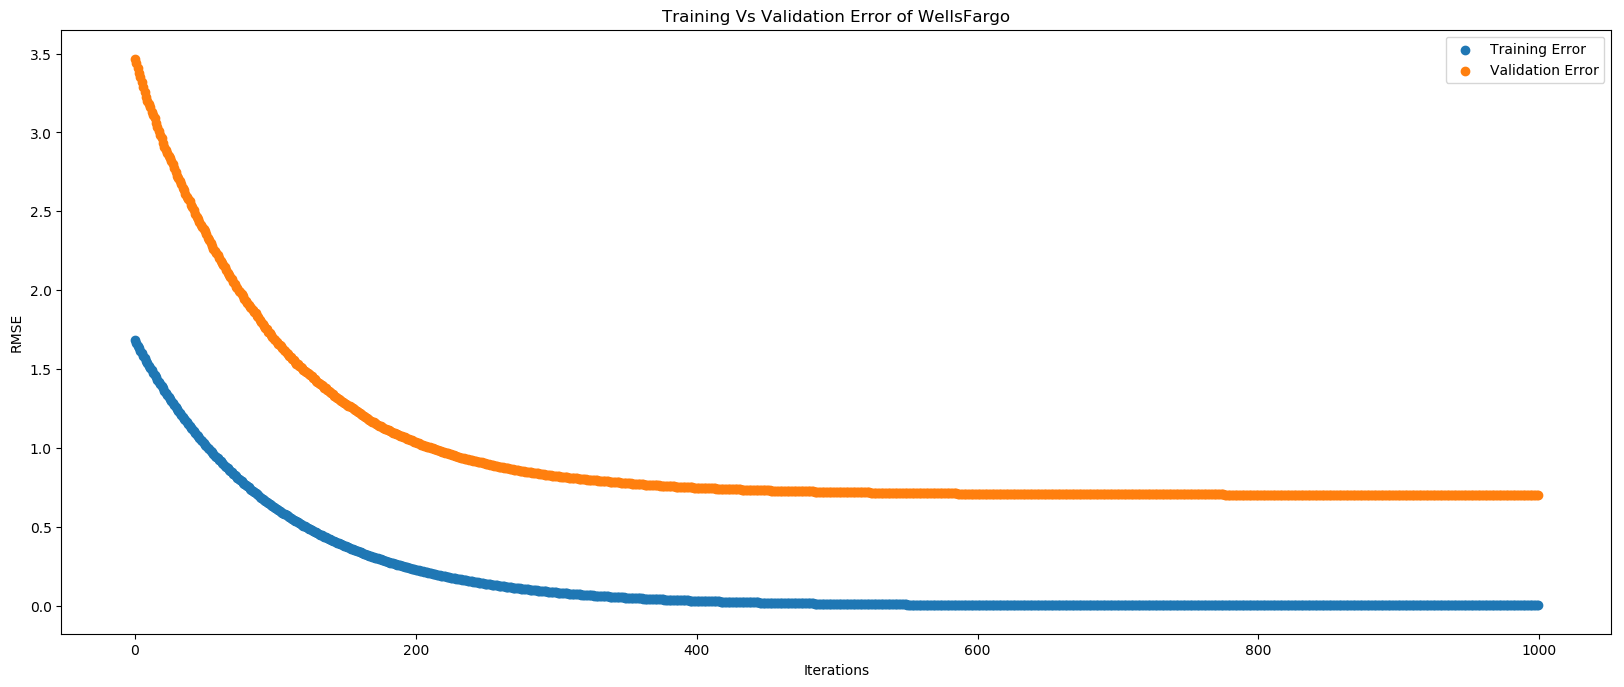

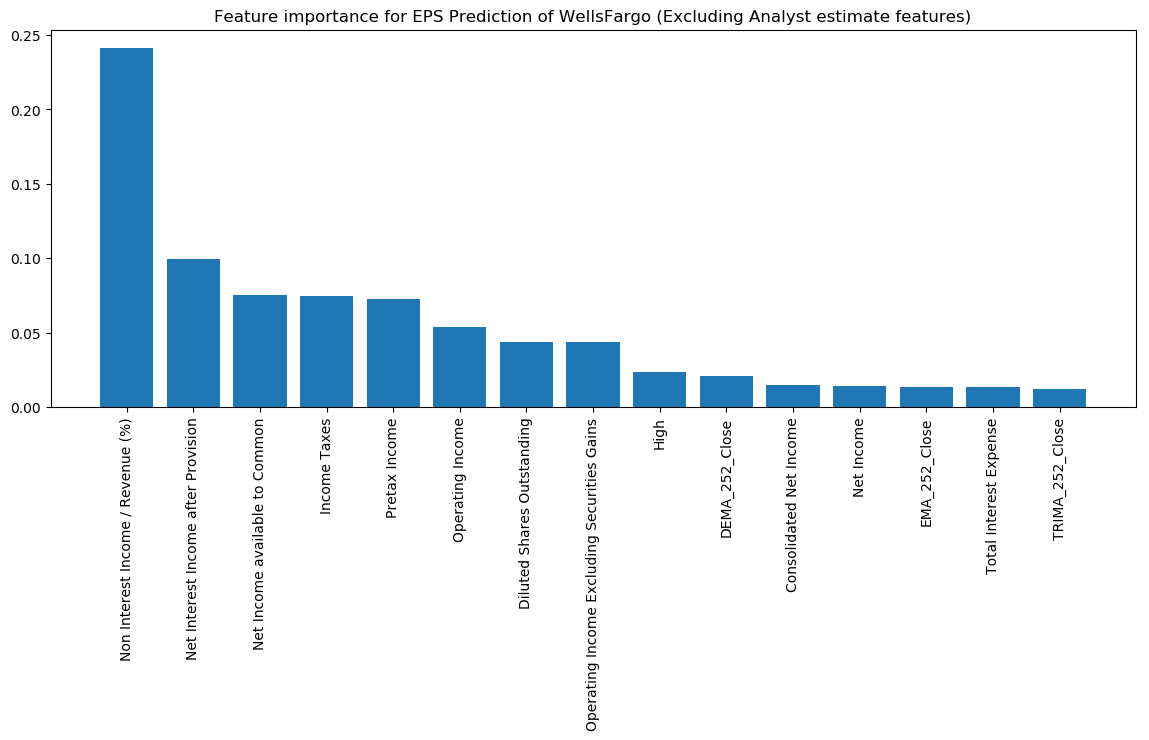

[20:54:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 3.343841


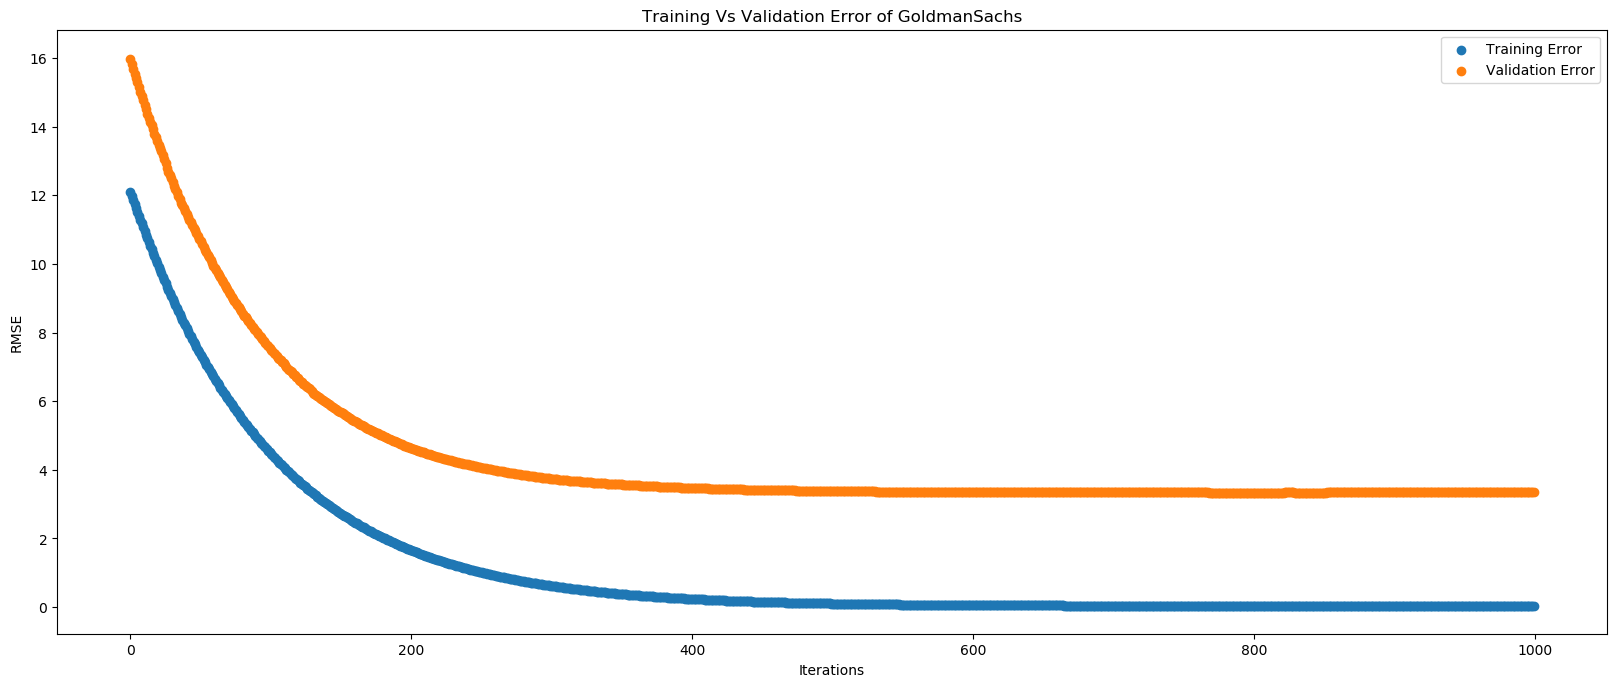

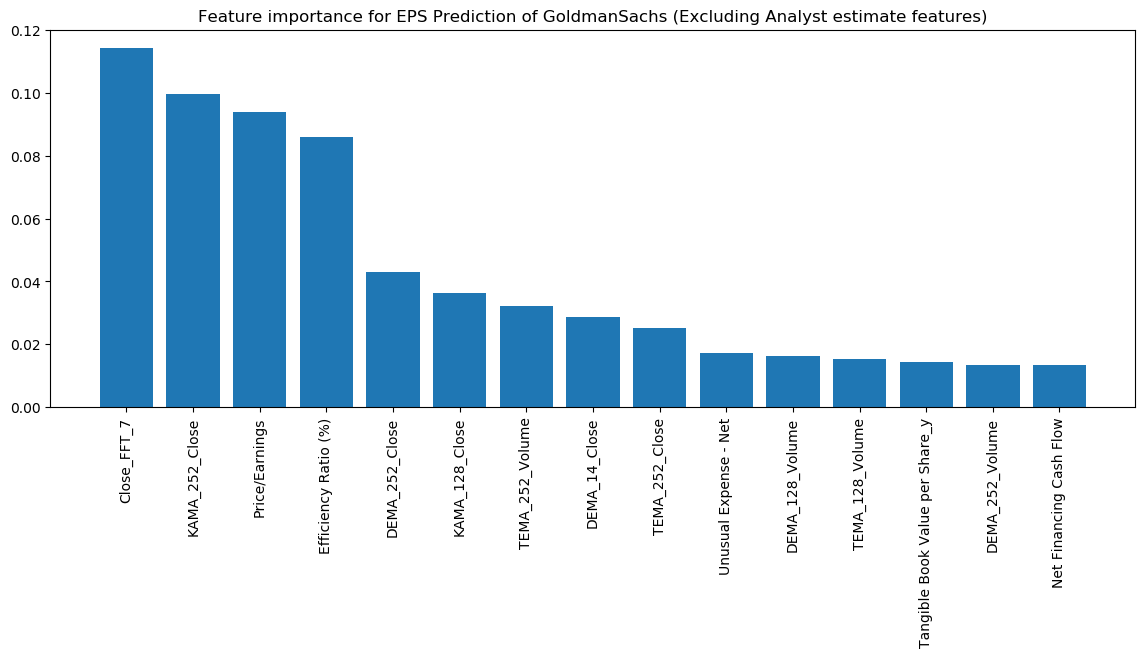

In [22]:
i = 0

for df in dataset:
    (X_train, Y_train), (X_test, Y_test) = getData(df, inc_analyst=False)
    m2 = Model(X_train, Y_train, X_test, Y_test)
    xgbModel2, regressor2 = m2.trainModel()
    plot.lossStatsAndCurve(X_test, Y_test, regressor2, ticker[i])


    feature_importance = xgbModel2.feature_importances_.tolist()
    plot.featureImportance(feature_importance, 15, 1, ticker[i])
    i = i + 1

***Note: Keeping EPS_Analyst feature improves our Model's predictive accuracy in both the Scenario which matches with out intuition***

# Feature Reduction using XGBoost's feature importance

In [42]:
def featureReduction(feature_importance):
    
    f = dict()
    n = len(feature_importance)
    for i in range (n):
        f[X_test.columns[i]] = feature_importance[i]
    f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
    feature_name = list()
    feature_values = list()
    for i, j in f:
        feature_name.append(i)
        feature_values.append(j)
    
    return feature_name, feature_values
    

In [57]:
(X_train, Y_train), (X_test, Y_test) = getData(df, inc_analyst=True)
feature_importance = xgbModel1.feature_importances_.tolist()
feature_sorted, _ = featureReduction(feature_importance)
df_temp = df.copy()

n_features_to_keep = 40
for f in feature_sorted[n_features_to_keep:-1]:
    for col in df_temp.columns:
        if col == f:
            del df_temp[col]
            
df_temp.shape[1]

43

[20:25:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.647092


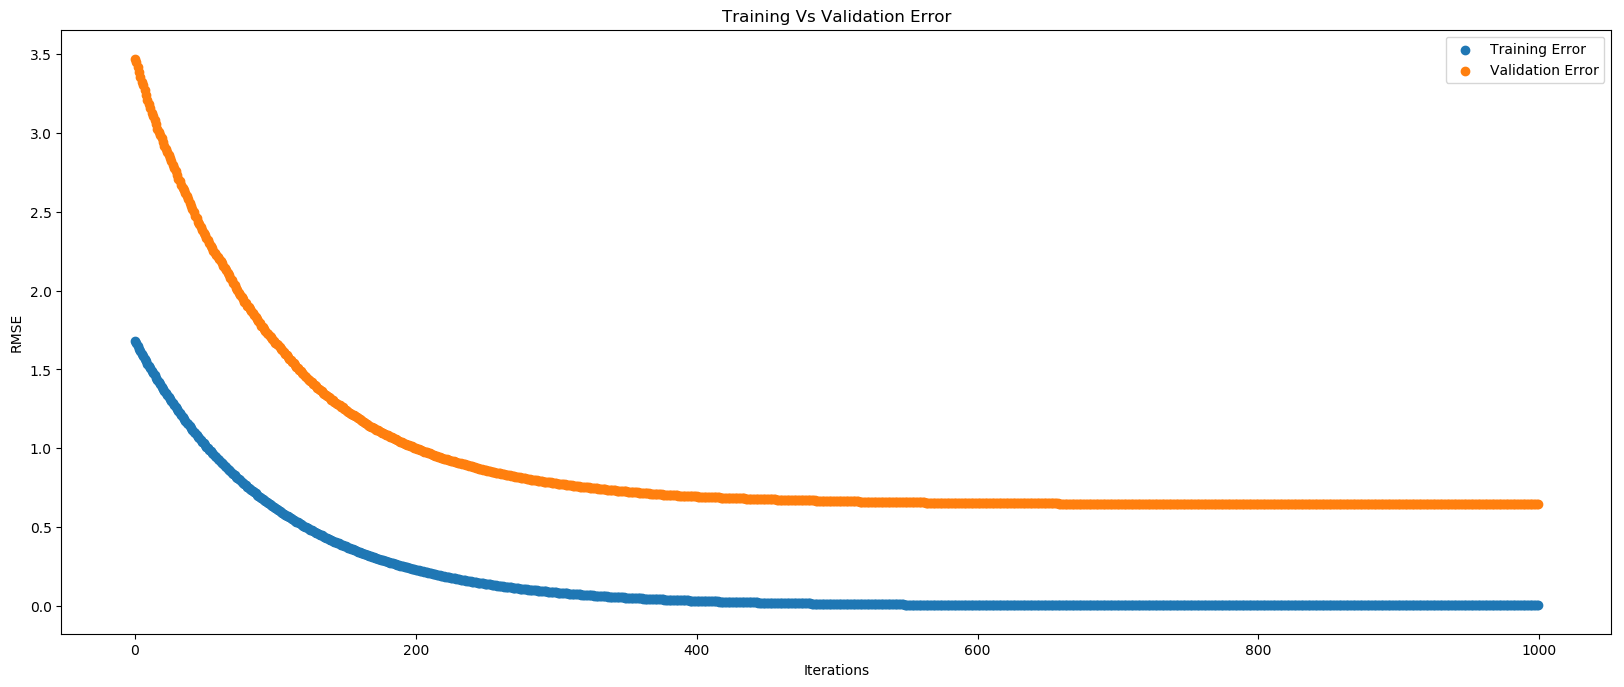

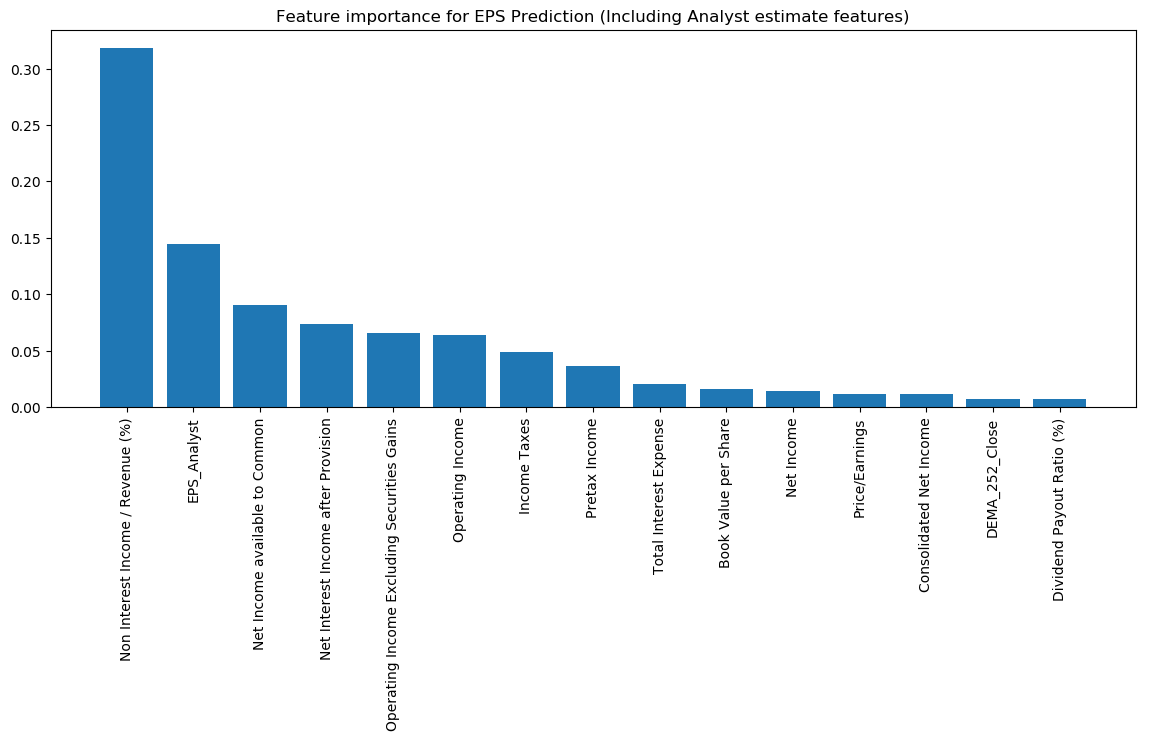

In [59]:
(X_train, Y_train), (X_test, Y_test) = getData(df_temp, inc_analyst=True)
m3 = Model(X_train, Y_train, X_test, Y_test)
xgbModel3, regressor3 = m3.trainModel()
plot.lossStatsAndCurve(X_test, Y_test, regressor3)


feature_importance = xgbModel3.feature_importances_.tolist()
plot.featureImportance(feature_importance, 15, 0)

***Note: Keeping 43 most predictive features reduces the Model's Root Mean Squared Error from 0.650777 to 0.647092 (Try playing with n_features_to_keep to improve the Model's predictive accuracy). Hence we can conclude that it is optimal to keep 43 most predictive features obtained from XGBoost's feature Importance***

# Using XGBoost for Earning Surprise Classification


In [227]:
def getDataClassification(data_temp):
    
    data = data_temp.copy()
    Y = data['Earning_Surprise_0.15']

    del data['Earning_Surprise_0.05']
    del data['Earning_Surprise_0.1']
    del data['Earning_Surprise_0.15']
    del data['EPS (diluted)']
    del data['EPS (recurring)']
    
    #del data['EPS_Analyst']
    #del data['Growth (YoY%)_Analyst']
    
    X = data
    train_samples = int(X.shape[0] * 0.5)
    
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    Y_train = Y.iloc[:train_samples]
    Y_test = Y.iloc[train_samples:]
    
    return X_train, Y_train, X_test, Y_test

In [228]:
X_train, Y_train, X_test, Y_test = getDataClassification(df_clf)
model = xgb.XGBClassifier()
model.fit(X_train, Y_train, verbose = True)
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.87%


In [229]:
print(classification_report(Y_test, predictions))
accuracy = accuracy_score(Y_test, predictions)
print ("Classifier Accuracy: ", accuracy)
cm = confusion_matrix(Y_test, predictions)
print ()
print ("Confusion Matrix:")
print (cm)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2391
          1       1.00      0.02      0.05        42
          2       0.00      0.00      0.00        62

avg / total       0.94      0.96      0.94      2495

Classifier Accuracy:  0.9587174348697395

Confusion Matrix:
[[2391    0    0]
 [  41    1    0]
 [  62    0    0]]


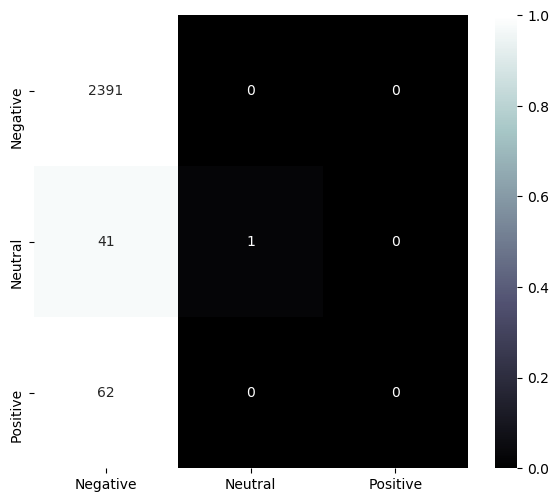

In [230]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm, ['Negative', 'Neutral', 'Positive'])